In [1]:
import pandas as pd
import os

input_path = r'C:\Users\wayne\Downloads\test'
dict = {}

def mean(df):
    list = [ 'PM2.5', 'PM10','temp', 'humidity', 'CO2' ]
    for header in list:
        avg = df[header].mean()
        if header not in dict:
            dict[header] = []
        dict[header].append(avg)
    return pd.DataFrame.from_dict(data=dict)

finalDF = None
for root, dirs, files in os.walk(input_path):
    for f in files:http://localhost:8888/notebooks/modify_sensordata.ipynb#
        input_source = os.path.join(input_path, f)
        inputdata = pd.read_csv(input_source)
        finalDF = mean(inputdata)
    print(finalDF)

        PM2.5       PM10       temp   humidity          CO2
0    2.505682   3.205474  26.732868   8.527473   601.697422
1    2.533863   3.929277  23.571836  10.959669   731.942104
2    0.808707   0.873260  29.971607  10.993800   721.140230
3    4.780102   9.436494  27.097342   7.811483   539.063882
4    4.497745  20.272825  27.363986   9.345740   494.706181
5    9.872583  16.115097  25.425145  20.247755   783.416838
6    1.980394   2.780456  23.347135  13.075339   767.043221
7    2.713089   4.415066  23.654300  12.799224   688.135470
8    1.835561   2.508107  27.056365  12.350440   560.325037
9    1.299451   3.492987  31.949769  13.601058  1118.903062
10   1.957364   5.820116  23.113712  11.142090   769.723437
11   2.077981   3.380387  26.807219   8.767245   659.414505
12   2.433016   4.963558  24.981379   9.700102   567.348838
13   1.780547   2.046544  26.286490   9.756455   670.776868
14   2.042377   3.171808  26.380289  12.357371   680.937237
15   2.917601   5.257762  28.301739  10.

In [2]:
file_list = os.listdir(input_path)
file_list = [f.replace(".csv", "") for f in file_list]
file_list = [f.replace("dec17-", "") for f in file_list]
print(file_list)

['ww11', 'ww12', 'ww16', 'ww18', 'ww22', 'ww24', 'ww25', 'ww26', 'ww27', 'ww28', 'ww30', 'ww31', 'ww32', 'ww33', 'ww34', 'ww37', 'ww38', 'ww39', 'ww40', 'ww41', 'ww42', 'ww9']


In [3]:
finalDF['filename'] = file_list
finalDF = finalDF.set_index('filename')
finalDF.rename(columns={'PM2.5':'avg PM2.5', 
                         'PM10':'avg PM10',
                         'temp':'avg temp', 
                         'humidity':'avg humidity',
                         'CO2':'avg CO2'},inplace=True)
finalDF.sort_index(axis=1,ascending=True)
print(finalDF)

          avg PM2.5   avg PM10   avg temp  avg humidity      avg CO2
filename                                                            
ww11       2.505682   3.205474  26.732868      8.527473   601.697422
ww12       2.533863   3.929277  23.571836     10.959669   731.942104
ww16       0.808707   0.873260  29.971607     10.993800   721.140230
ww18       4.780102   9.436494  27.097342      7.811483   539.063882
ww22       4.497745  20.272825  27.363986      9.345740   494.706181
ww24       9.872583  16.115097  25.425145     20.247755   783.416838
ww25       1.980394   2.780456  23.347135     13.075339   767.043221
ww26       2.713089   4.415066  23.654300     12.799224   688.135470
ww27       1.835561   2.508107  27.056365     12.350440   560.325037
ww28       1.299451   3.492987  31.949769     13.601058  1118.903062
ww30       1.957364   5.820116  23.113712     11.142090   769.723437
ww31       2.077981   3.380387  26.807219      8.767245   659.414505
ww32       2.433016   4.963558  24

In [4]:
buildingheader = ['filename','building name']
building = pd.read_csv(r'C:\Users\wayne\Downloads\buildinglist.csv')
building.columns = buildingheader
building.set_index('filename',inplace=True)
building.sort_index(axis=1,ascending=True)
print(building)

            building name
filename                 
ww2              PRC farm
ww3              PRC farm
ww5              PRC farm
ww7              PRC farm
RZ0              PRC farm
RZ1              PRC farm
ww8                Nisipy
ww9                Nisipy
ww10               Nisipy
ww11               Nisipy
ww12               Nisipy
ww16                  Hub
ww17                  Hub
ww18                  Hub
ww19      Lister back up?
ww21      Lister back up?
ww22                  Hub
ww24                  Hub
ww25            Mackenzie
ww26             Schaffer
ww27             Schaffer
ww28             Schaffer
ww30             Schaffer
ww31             Schaffer
ww32             Schaffer
ww33            Mackenzie
ww34            Mackenzie
ww36             Schaffer
ww37            Mackenzie
ww38            Mackenzie
ww39            Mackenzie
ww40             Schaffer
ww41            Mackenzie
ww42            Mackenzie
ww43               Nisipy
ww44               Nisipy
ww45        

In [5]:
finalDF["building name"]=building

df = finalDF.reset_index()
df.drop('filename',axis=1,inplace=True)
print(df)


    avg PM2.5   avg PM10   avg temp  avg humidity      avg CO2 building name
0    2.505682   3.205474  26.732868      8.527473   601.697422        Nisipy
1    2.533863   3.929277  23.571836     10.959669   731.942104        Nisipy
2    0.808707   0.873260  29.971607     10.993800   721.140230           Hub
3    4.780102   9.436494  27.097342      7.811483   539.063882           Hub
4    4.497745  20.272825  27.363986      9.345740   494.706181           Hub
5    9.872583  16.115097  25.425145     20.247755   783.416838           Hub
6    1.980394   2.780456  23.347135     13.075339   767.043221     Mackenzie
7    2.713089   4.415066  23.654300     12.799224   688.135470      Schaffer
8    1.835561   2.508107  27.056365     12.350440   560.325037      Schaffer
9    1.299451   3.492987  31.949769     13.601058  1118.903062      Schaffer
10   1.957364   5.820116  23.113712     11.142090   769.723437      Schaffer
11   2.077981   3.380387  26.807219      8.767245   659.414505      Schaffer

In [6]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

# scaled_data = preprocessing.scale(finalDF)
# pca = PCA()
# pca.fit(scaled_data)
# pca_data = pca.transform(scaled_data)
# print(pca_data)

In [7]:
# per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
# labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
# plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
# plt.ylabel('Percentage of Explained Variance')
# plt.xlabel('Principal Component')
# plt.title('Scree Plot')
# plt.show()
 
# #the following code makes a fancy looking plot using PC1 and PC2
# pca_df = pd.DataFrame(pca_data, index=[*s, *n, *m, *h], columns=labels)
 
# plt.scatter(pca_df.PC1, pca_df.PC2)
# plt.title('My PCA Graph')
# plt.xlabel('PC1 - {0}%'.format(per_var[0]))
# plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
# plt.show()

In [8]:
## from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.preprocessing import StandardScaler

features = ['avg PM2.5', 'avg PM10', 'avg temp', 'avg humidity', 'avg CO2']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['building name']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)


from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca

,0,1,2,3,4
0,-1.111683,-0.710007,-0.390336,-0.141728,-0.331420
1,-0.278763,-0.329765,1.297172,-0.715306,0.129245
2,-1.277969,1.258411,-0.777223,0.736819,-0.189316
3,-0.039744,-1.633268,-1.258199,-0.179436,-0.176395
4,1.386338,-2.316083,-1.745780,0.552290,1.314530
5,4.718350,0.415531,1.167357,1.081306,-0.212087
6,-0.107195,0.223231,1.928350,-0.321483,0.161129
7,0.089432,-0.360801,1.557199,-0.043097,0.041995
8,-0.738119,-0.280346,0.304631,1.159535,-0.394885
9,0.182611,4.166359,-0.965858,-0.064839,0.644530


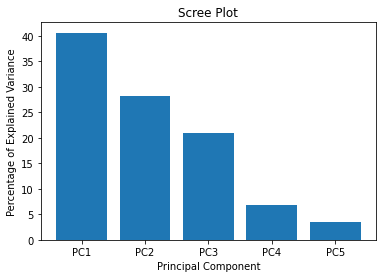

In [9]:
explained_variance = pca.explained_variance_ratio_
explained_variance

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [10]:
x_pca['target']=y
x_pca.columns = ['PC1','PC2','PC3', 'PC4','PC5','target']

x_pca


,PC1,PC2,PC3,PC4,PC5,target
0,-1.111683,-0.710007,-0.390336,-0.141728,-0.331420,Nisipy
1,-0.278763,-0.329765,1.297172,-0.715306,0.129245,Nisipy
2,-1.277969,1.258411,-0.777223,0.736819,-0.189316,Hub
3,-0.039744,-1.633268,-1.258199,-0.179436,-0.176395,Hub
4,1.386338,-2.316083,-1.745780,0.552290,1.314530,Hub
5,4.718350,0.415531,1.167357,1.081306,-0.212087,Hub
6,-0.107195,0.223231,1.928350,-0.321483,0.161129,Mackenzie
7,0.089432,-0.360801,1.557199,-0.043097,0.041995,Schaffer
8,-0.738119,-0.280346,0.304631,1.159535,-0.394885,Schaffer
9,0.182611,4.166359,-0.965858,-0.064839,0.644530,Schaffer


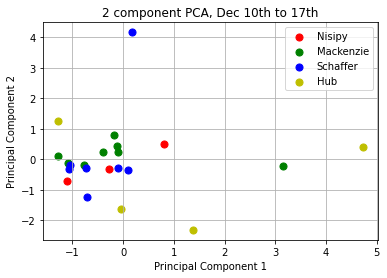

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA, Dec 10th to 17th')
targets = ['Nisipy','Mackenzie','Schaffer', 'Hub']
colors = ['r','g','b','y']
for target, color in zip(targets,colors):
    indicesToKeep = x_pca['target'] == target
    ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
    , x_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

In [13]:
print(abs( pca.components_ ))

# pca.components_ has shape [n_components, n_features]
# which mean first row is for PC1 with all the features

[[0.63977986 0.57941511 0.06425838 0.46082878 0.19613146]
 [0.14730265 0.31542614 0.44541289 0.344153   0.74964949]
 [0.18264281 0.30567651 0.78868163 0.49527586 0.07672407]
 [0.27105676 0.02417581 0.40508487 0.65022678 0.58228442]
 [0.67981872 0.68612089 0.1066103  0.03320387 0.23370146]]
